In [68]:
import pandas as pd
url = 'https://www.ausstats.abs.gov.au/ausstats/ABS@archive.nsf/0/D5044B5F65AFD893CA25852F001DE5F5/$File/310104.xls'

In [69]:
# Sorting column index, cleaning data format
population = pd.read_excel(url, sheet_name='Data1', index_col = 'Unnamed: 0', parse_dates=True)
population = population[9:]
population.columns = population.columns.str.replace('Estimated Resident Population ;  ','').str.replace('Male ; ', '').str.replace('Female ; ','').str.replace('Persons ; ','').str.replace(';','').str.strip()
a = ['Male']*9 + ['Female']*9 + ['Persons']*9
tuples = list(zip(a, population.columns))
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])
population.columns = index
#population.columns
tuples
#population.to_csv('C:/Users/li116/OneDrive/Desktop/python project/Red point/population.csv')

[('Male', 'New South Wales'),
 ('Male', 'Victoria'),
 ('Male', 'Queensland'),
 ('Male', 'South Australia'),
 ('Male', 'Western Australia'),
 ('Male', 'Tasmania'),
 ('Male', 'Northern Territory'),
 ('Male', 'Australian Capital Territory'),
 ('Male', 'Australia'),
 ('Female', 'New South Wales'),
 ('Female', 'Victoria'),
 ('Female', 'Queensland'),
 ('Female', 'South Australia'),
 ('Female', 'Western Australia'),
 ('Female', 'Tasmania'),
 ('Female', 'Northern Territory'),
 ('Female', 'Australian Capital Territory'),
 ('Female', 'Australia'),
 ('Persons', 'New South Wales'),
 ('Persons', 'Victoria'),
 ('Persons', 'Queensland'),
 ('Persons', 'South Australia'),
 ('Persons', 'Western Australia'),
 ('Persons', 'Tasmania'),
 ('Persons', 'Northern Territory'),
 ('Persons', 'Australian Capital Territory'),
 ('Persons', 'Australia')]

In [70]:
# getting data from the last ten years
population.index = pd.to_datetime(population.index)
years10_1st = population.index.year.unique()[-11:][0]
years10_1st
population.index

DatetimeIndex(['1981-06-01', '1981-09-01', '1981-12-01', '1982-03-01',
               '1982-06-01', '1982-09-01', '1982-12-01', '1983-03-01',
               '1983-06-01', '1983-09-01',
               ...
               '2017-06-01', '2017-09-01', '2017-12-01', '2018-03-01',
               '2018-06-01', '2018-09-01', '2018-12-01', '2019-03-01',
               '2019-06-01', '2019-09-01'],
              dtype='datetime64[ns]', length=154, freq=None)

In [71]:
population_10years= population.loc[population.index.year >= years10_1st]
population_10years

first                 Male                                      \
second     New South Wales Victoria Queensland South Australia   
2009-03-01         3492115  2650782    2151248          793076   
2009-06-01         3502936  2663347    2162727          795656   
2009-09-01         3515766  2676690    2173057          798776   
2009-12-01         3526643  2686022    2181500          800926   
2010-03-01         3540212  2698331    2191170          803566   
2010-06-01         3548107  2705597    2199403          805365   
2010-09-01         3557269  2713247    2207276          806976   
2010-12-01         3565558  2720959    2214429          808037   
2011-03-01         3577883  2732846    2224704          810216   
2011-06-01         3585109  2740959    2233959          811845   
2011-09-01         3594974  2753738    2244366          813765   
2011-12-01         3604198  2766513    2253923          815608   
2012-03-01         3617039  2783292    2267184          818519   
2012-06-01         3626400  2796315    2278629          820600   
2012-09-01         3637647  2810993    2290569          822297   
2012-12-01         3650035  2825349    2299776          823688   
2013-03-01         3664409  2842811    2310867          826272   
2013-06-01         3674410  2856419    2319267          827964   
2013-09-01         3687294  2871393    2327459          829769   
2013-12-01         3698220  2884387    2333762          830900   
2014-03-01         3714264  2902774    2343145          833675   
2014-06-01         3724215  2915277    2349563          835164   
2014-09-01         3737719  2930934    2356039          836736   
2014-12-01         3750061  2945763    2361282          838094   
2015-03-01         3766915  2964190    2368799          840589   
2015-06-01         3776574  2977200    2374439          841522   
2015-09-01         3790716  2994248    2380319          842864   
2015-12-01         3803289  3011376    2385347          843702   
2016-03-01         3821409  3034156    2394996          845824   
2016-06-01         3833807  3051056    2403173          846877   
2016-09-01         3852268  3069372    2412505          848406   
2016-12-01         3867409  3086832    2420995          848806   
2017-03-01         3888090  3111412    2432472          850894   
2017-06-01         3901024  3126024    2442204          851836   
2017-09-01         3917556  3143734    2450252          853450   
2017-12-01         3927651  3158916    2457067          853964   
2018-03-01         3947285  3182283    2469205          856620   
2018-06-01         3959679  3197767    2479164          857882   
2018-09-01         3977950  3217493    2489013          860228   
2018-12-01         3989101  3231959    2497528          861182   
2019-03-01         4006435  3252731    2509602          864014   
2019-06-01         4015829  3266931    2518836          865528   
2019-09-01         4029668  3284155    2528307          867787   

first                                                     \
second     Western Australia Tasmania Northern Territory   
2009-03-01           1123379   249633             117033   
2009-06-01           1129438   250255             118321   
2009-09-01           1135694   250929             119000   
2009-12-01           1140480   251434             119297   
2010-03-01           1147794   252462             119772   
2010-06-01           1154064   252953             120516   
2010-09-01           1161154   253362             120926   
2010-12-01           1167862   253833             120979   
2011-03-01           1177289   254499             120802   
2011-06-01           1185050   254790             121483   
2011-09-01           1193472   254896             122071   
2011-12-01           1202068   254814             122136   
2012-03-01           1214355   254866             122702   
2012-06-01           1223614   254786             123533   
2012-09-01           1232568   254663             124377   
2012-12-0

In [72]:
#Getting male data
population_10years_male = population_10years['Male']
population_10years_male

second,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
2009-03-01,3492115,2650782,2151248,793076,1123379,249633,117033,175491,10754502
2009-06-01,3502936,2663347,2162727,795656,1129438,250255,118321,176325,10800797
2009-09-01,3515766,2676690,2173057,798776,1135694,250929,119000,177083,10848831
2009-12-01,3526643,2686022,2181500,800926,1140480,251434,119297,177822,10886022
2010-03-01,3540212,2698331,2191170,803566,1147794,252462,119772,179028,10934255
2010-06-01,3548107,2705597,2199403,805365,1154064,252953,120516,179860,10967831
2010-09-01,3557269,2713247,2207276,806976,1161154,253362,120926,180419,11002611
2010-12-01,3565558,2720959,2214429,808037,1167862,253833,120979,181314,11034979
2011-03-01,3577883,2732846,2224704,810216,1177289,254499,120802,182399,11082660
2011-06-01,3585109,2740959,2233959,811845,1185050,254790,121483,182996,11118234


In [29]:
# transform population into population increase
changeRate_male_10 = population_10years_male.pct_change()
changeRate_male_10

second,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
2009-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-06-01,0.003099,0.004740,0.005336,0.003253,0.005394,0.002492,0.011005,0.004752,0.004305
2009-09-01,0.003663,0.005010,0.004776,0.003921,0.005539,0.002693,0.005739,0.004299,0.004447
2009-12-01,0.003094,0.003486,0.003885,0.002692,0.004214,0.002013,0.002496,0.004173,0.003428
2010-03-01,0.003848,0.004583,0.004433,0.003296,0.006413,0.004089,0.003982,0.006782,0.004431
2010-06-01,0.002230,0.002693,0.003757,0.002239,0.005463,0.001945,0.006212,0.004647,0.003071
2010-09-01,0.002582,0.002827,0.003580,0.002000,0.006144,0.001617,0.003402,0.003108,0.003171
2010-12-01,0.002330,0.002842,0.003241,0.001315,0.005777,0.001859,0.000438,0.004961,0.002942
2011-03-01,0.003457,0.004369,0.004640,0.002697,0.008072,0.002624,-0.001463,0.005984,0.004321
2011-06-01,0.002020,0.002969,0.004160,0.002011,0.006592,0.001143,0.005637,0.003273,0.003210


2009-06-01 00:00:00
Northern Territory


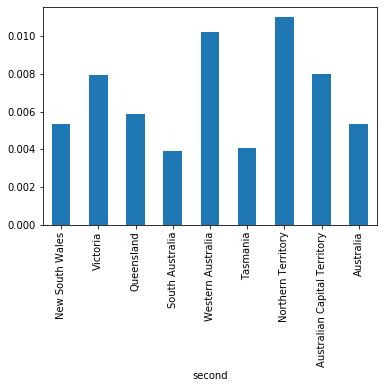

In [60]:
# getting the highest increase 
changeRate_male_10_row = changeRate_male_10.max(axis = 1)
print(changeRate_male_10_row.idxmax())
changeRate_male_10_col = changeRate_male_10.max(axis = 0)
print(changeRate_male_10_col.idxmax())

changeRate_male_10_col.plot(kind = 'bar')